# Jupyter Data Science Workflow

## From Exploratory analysis to reproducible science

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [8]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x179552e8a30>)

In [12]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

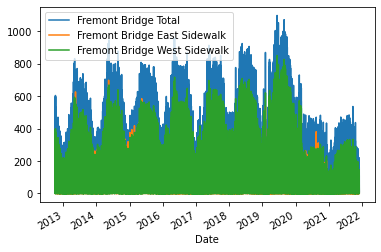

In [19]:
%matplotlib inline
data.plot()

<AxesSubplot:xlabel='Date'>

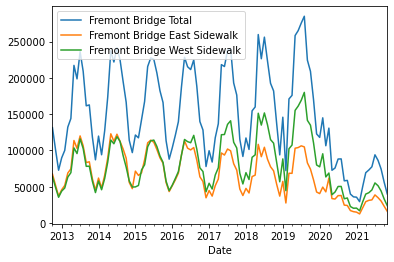

In [26]:
%matplotlib inline
data.resample('M').sum().plot()

<AxesSubplot:xlabel='Date'>

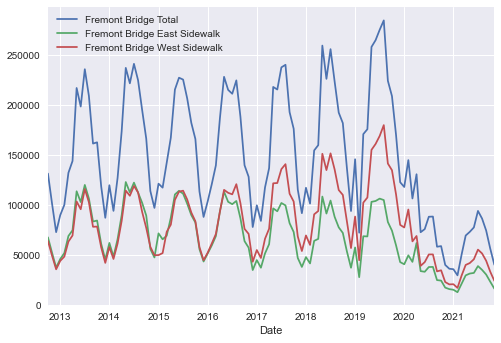

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.column = ['Weat', 'East']

data.resample('M').sum().plot()

(0.0, 2526645.45)

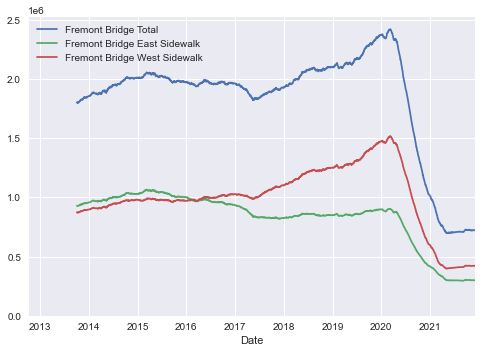

In [37]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

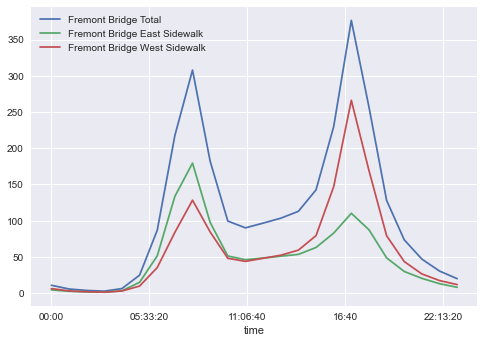

In [39]:
data.groupby(data.index.time).mean().plot()

In [54]:
pivoted = data.pivot_table('Fremont Bridge Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

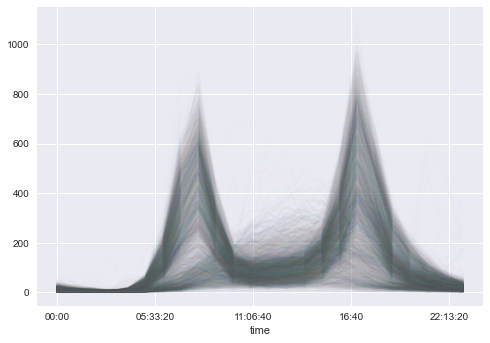

In [55]:
pivoted.plot(legend=False, alpha=0.01)